In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip


In [2]:
import pandas as pd
import zipfile

zf_train = zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip') # having First.csv zipped file.
train = pd.read_csv(zf_train.open('train.csv'))
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
zf_test = zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip') # having First.csv zipped file.
test = pd.read_csv(zf_test.open('test.csv'))

In [4]:
zf_labels = zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip') # having First.csv zipped file.
test_labels = pd.read_csv(zf_labels.open('test_labels.csv'))

In [5]:
array = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']
arr = []
for value in array:
    count = 0
    for val in train[value].values:
        if val == 1:
            count = count + 1
    arr.append((value,count))
        

In [6]:
number_of_comments = pd.DataFrame(arr).rename(columns = {0:'type',1:'number'})

Text(0, 0.5, 'Number of occurances')

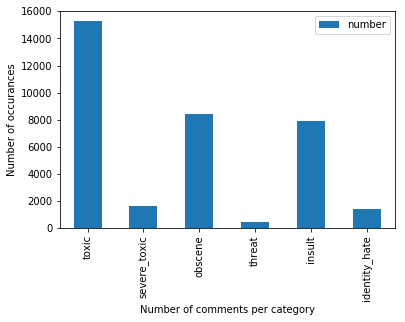

In [7]:
number_of_comments.set_index('type').plot(kind = 'bar')
plt.xlabel('Number of comments per category')
plt.ylabel('Number of occurances')

In [8]:
#lets find out how many comments have multi label
train.iloc[:,2:].sum(axis = 1)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

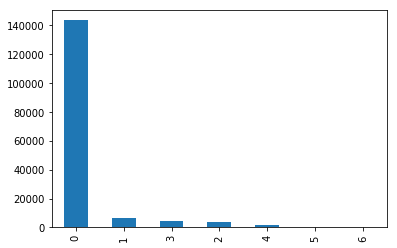

In [9]:
train.iloc[:,2:].sum(axis = 1).value_counts().plot(kind = 'bar') # zero signifies sum of rows zero 
# 1 is number of rows with sum of one 2 is number of rows whose sum is two

In [10]:
# percent of comments that are not labeled
len(train[(train['toxic'] == 0) & (train['severe_toxic'] == 0) & (train['obscene'] == 0) & (train['threat'] == 0) & (train['insult'] == 0) & (train['identity_hate'] == 0)])/len(train)
# so we observe that 89 percent of the comments are not labeled

0.8983211235124177

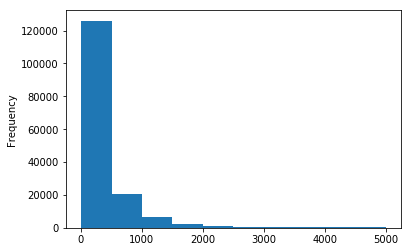

In [11]:
# the distribution of number of words in the comments text
train['comment_text'].str.len().plot(kind = 'hist')
# from this we observe that most of the comments are 500 characters with some comments upto 1000 characters and there are also
# some comments who range upto 5000 characters

In [12]:
train['comment_text'][78]
st = stopwords.words('english')
from nltk.stem import SnowballStemmer
snow_ball_stemmer = SnowballStemmer('english')
#text = text.apply(lambda x : ' '.join([snow_ball_stemmer.stem(word.lower()) for word in x.split()]))

In [13]:
text = train['comment_text']
text = text.apply(lambda x : re.sub('<.*>',' ',x))
text = text.apply(lambda x : re.sub(r'[?|!|\'|"|#]',r'',x))  #removing punctuations
text = text.apply(lambda x : re.sub(r'[.|,|)|(|\\|/]',r' ',x))# if you find this punctuations substitute with space
text = text.apply(lambda x : re.sub(r'\s+',r' ',x))
text = text.apply(lambda x : ' '.join([word for word in x.split() if word.isalpha()]))
text = text.apply(lambda x : ' '.join([word for word in x.split() if word.lower() not in st]))
text = text.apply(lambda x : ' '.join([snow_ball_stemmer.stem(word.lower()) for word in x.split()]))
text

0         explan edit made usernam hardcor metallica fan...
1         daww match background colour im seem stuck tha...
2         hey man im realli tri edit war guy constant re...
3         cant make real suggest improv wonder section s...
4                           sir hero chanc rememb page that
                                ...                        
159566    second time ask view complet contradict covera...
159567                    asham horribl thing put talk page
159568    spitzer umm there actual articl prostitut ring...
159569    look like actual put speedi first version dele...
159570    realli dont think understand came idea bad rig...
Name: comment_text, Length: 159571, dtype: object

In [14]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']
from sklearn.model_selection import train_test_split
train,test = train_test_split(train,test_size = 0.35)

In [15]:
X_train = train['comment_text']
X_test = test['comment_text']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [17]:
nb_pipeline = Pipeline([('count_vec',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',OneVsRestClassifier(MultinomialNB()))])
for category in categories:
    nb_pipeline.fit(X_train,train[category])
    pred = nb_pipeline.predict(X_test)
    print(category,'----->',classification_report(pred,test[category]))

toxic ----->               precision    recall  f1-score   support

           0       1.00      0.91      0.96     55124
           1       0.13      0.99      0.23       726

    accuracy                           0.92     55850
   macro avg       0.57      0.95      0.59     55850
weighted avg       0.99      0.92      0.95     55850

severe_toxic ----->               precision    recall  f1-score   support

           0       1.00      0.99      0.99     55849
           1       0.00      0.00      0.00         1

    accuracy                           0.99     55850
   macro avg       0.50      0.49      0.50     55850
weighted avg       1.00      0.99      0.99     55850

obscene ----->               precision    recall  f1-score   support

           0       1.00      0.95      0.97     55630
           1       0.07      1.00      0.14       220

    accuracy                           0.95     55850
   macro avg       0.54      0.97      0.55     55850
weighted avg       1.00   

In [18]:
len(test[category].values)

55850

In [19]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
train,test = train_test_split(train,test_size = 0.34)
X_train = train['comment_text']
X_test = test['comment_text']
linear_svc = Pipeline([('count_vec',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',OneVsRestClassifier(LinearSVC(),n_jobs = -1))])
for category in categories:
    linear_svc.fit(X_train,train[category])
    pred = linear_svc.predict(X_test)
    print(category,'------>',classification_report(pred,test[category]))

toxic ------>               precision    recall  f1-score   support

           0       0.99      0.97      0.98     32663
           1       0.68      0.87      0.76      2603

    accuracy                           0.96     35266
   macro avg       0.83      0.92      0.87     35266
weighted avg       0.97      0.96      0.96     35266

severe_toxic ------>               precision    recall  f1-score   support

           0       1.00      0.99      0.99     35103
           1       0.23      0.50      0.32       163

    accuracy                           0.99     35266
   macro avg       0.61      0.75      0.66     35266
weighted avg       0.99      0.99      0.99     35266

obscene ------>               precision    recall  f1-score   support

           0       0.99      0.98      0.99     33801
           1       0.70      0.89      0.78      1465

    accuracy                           0.98     35266
   macro avg       0.85      0.93      0.89     35266
weighted avg       0.98

In [20]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
train,test = train_test_split(train,test_size = 0.34)
X_train = train['comment_text']
X_test = test['comment_text']
logistic = Pipeline([('count_vec',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',OneVsRestClassifier(LogisticRegression(),n_jobs = -1))])
for category in categories:
    logistic.fit(X_train,train[category])
    pred = logistic.predict(X_test)
    print(category,'------>',classification_report(pred,test[category]))

toxic ------>               precision    recall  f1-score   support

           0       1.00      0.95      0.97     22032
           1       0.53      0.93      0.67      1243

    accuracy                           0.95     23275
   macro avg       0.76      0.94      0.82     23275
weighted avg       0.97      0.95      0.96     23275

severe_toxic ------>               precision    recall  f1-score   support

           0       1.00      0.99      1.00     23178
           1       0.22      0.54      0.32        97

    accuracy                           0.99     23275
   macro avg       0.61      0.76      0.66     23275
weighted avg       0.99      0.99      0.99     23275

obscene ------>               precision    recall  f1-score   support

           0       1.00      0.97      0.99     22562
           1       0.53      0.93      0.67       713

    accuracy                           0.97     23275
   macro avg       0.76      0.95      0.83     23275
weighted avg       0.98